In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("mars-weather.csv")

In [3]:
df.set_index("id", inplace=True)

In [4]:
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [5]:
print(df.isnull().sum())

terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64


In [6]:
df = df.dropna(subset=["min_temp", "max_temp", "pressure"])

In [7]:
features = ["ls", "min_temp", "max_temp", "pressure"]

In [8]:
X = df[features].copy()
X_scaled = StandardScaler().fit_transform(X)

In [9]:
iso = IsolationForest(contamination=0.01, random_state=42)
df["anomaly"] = iso.fit_predict(X_scaled)

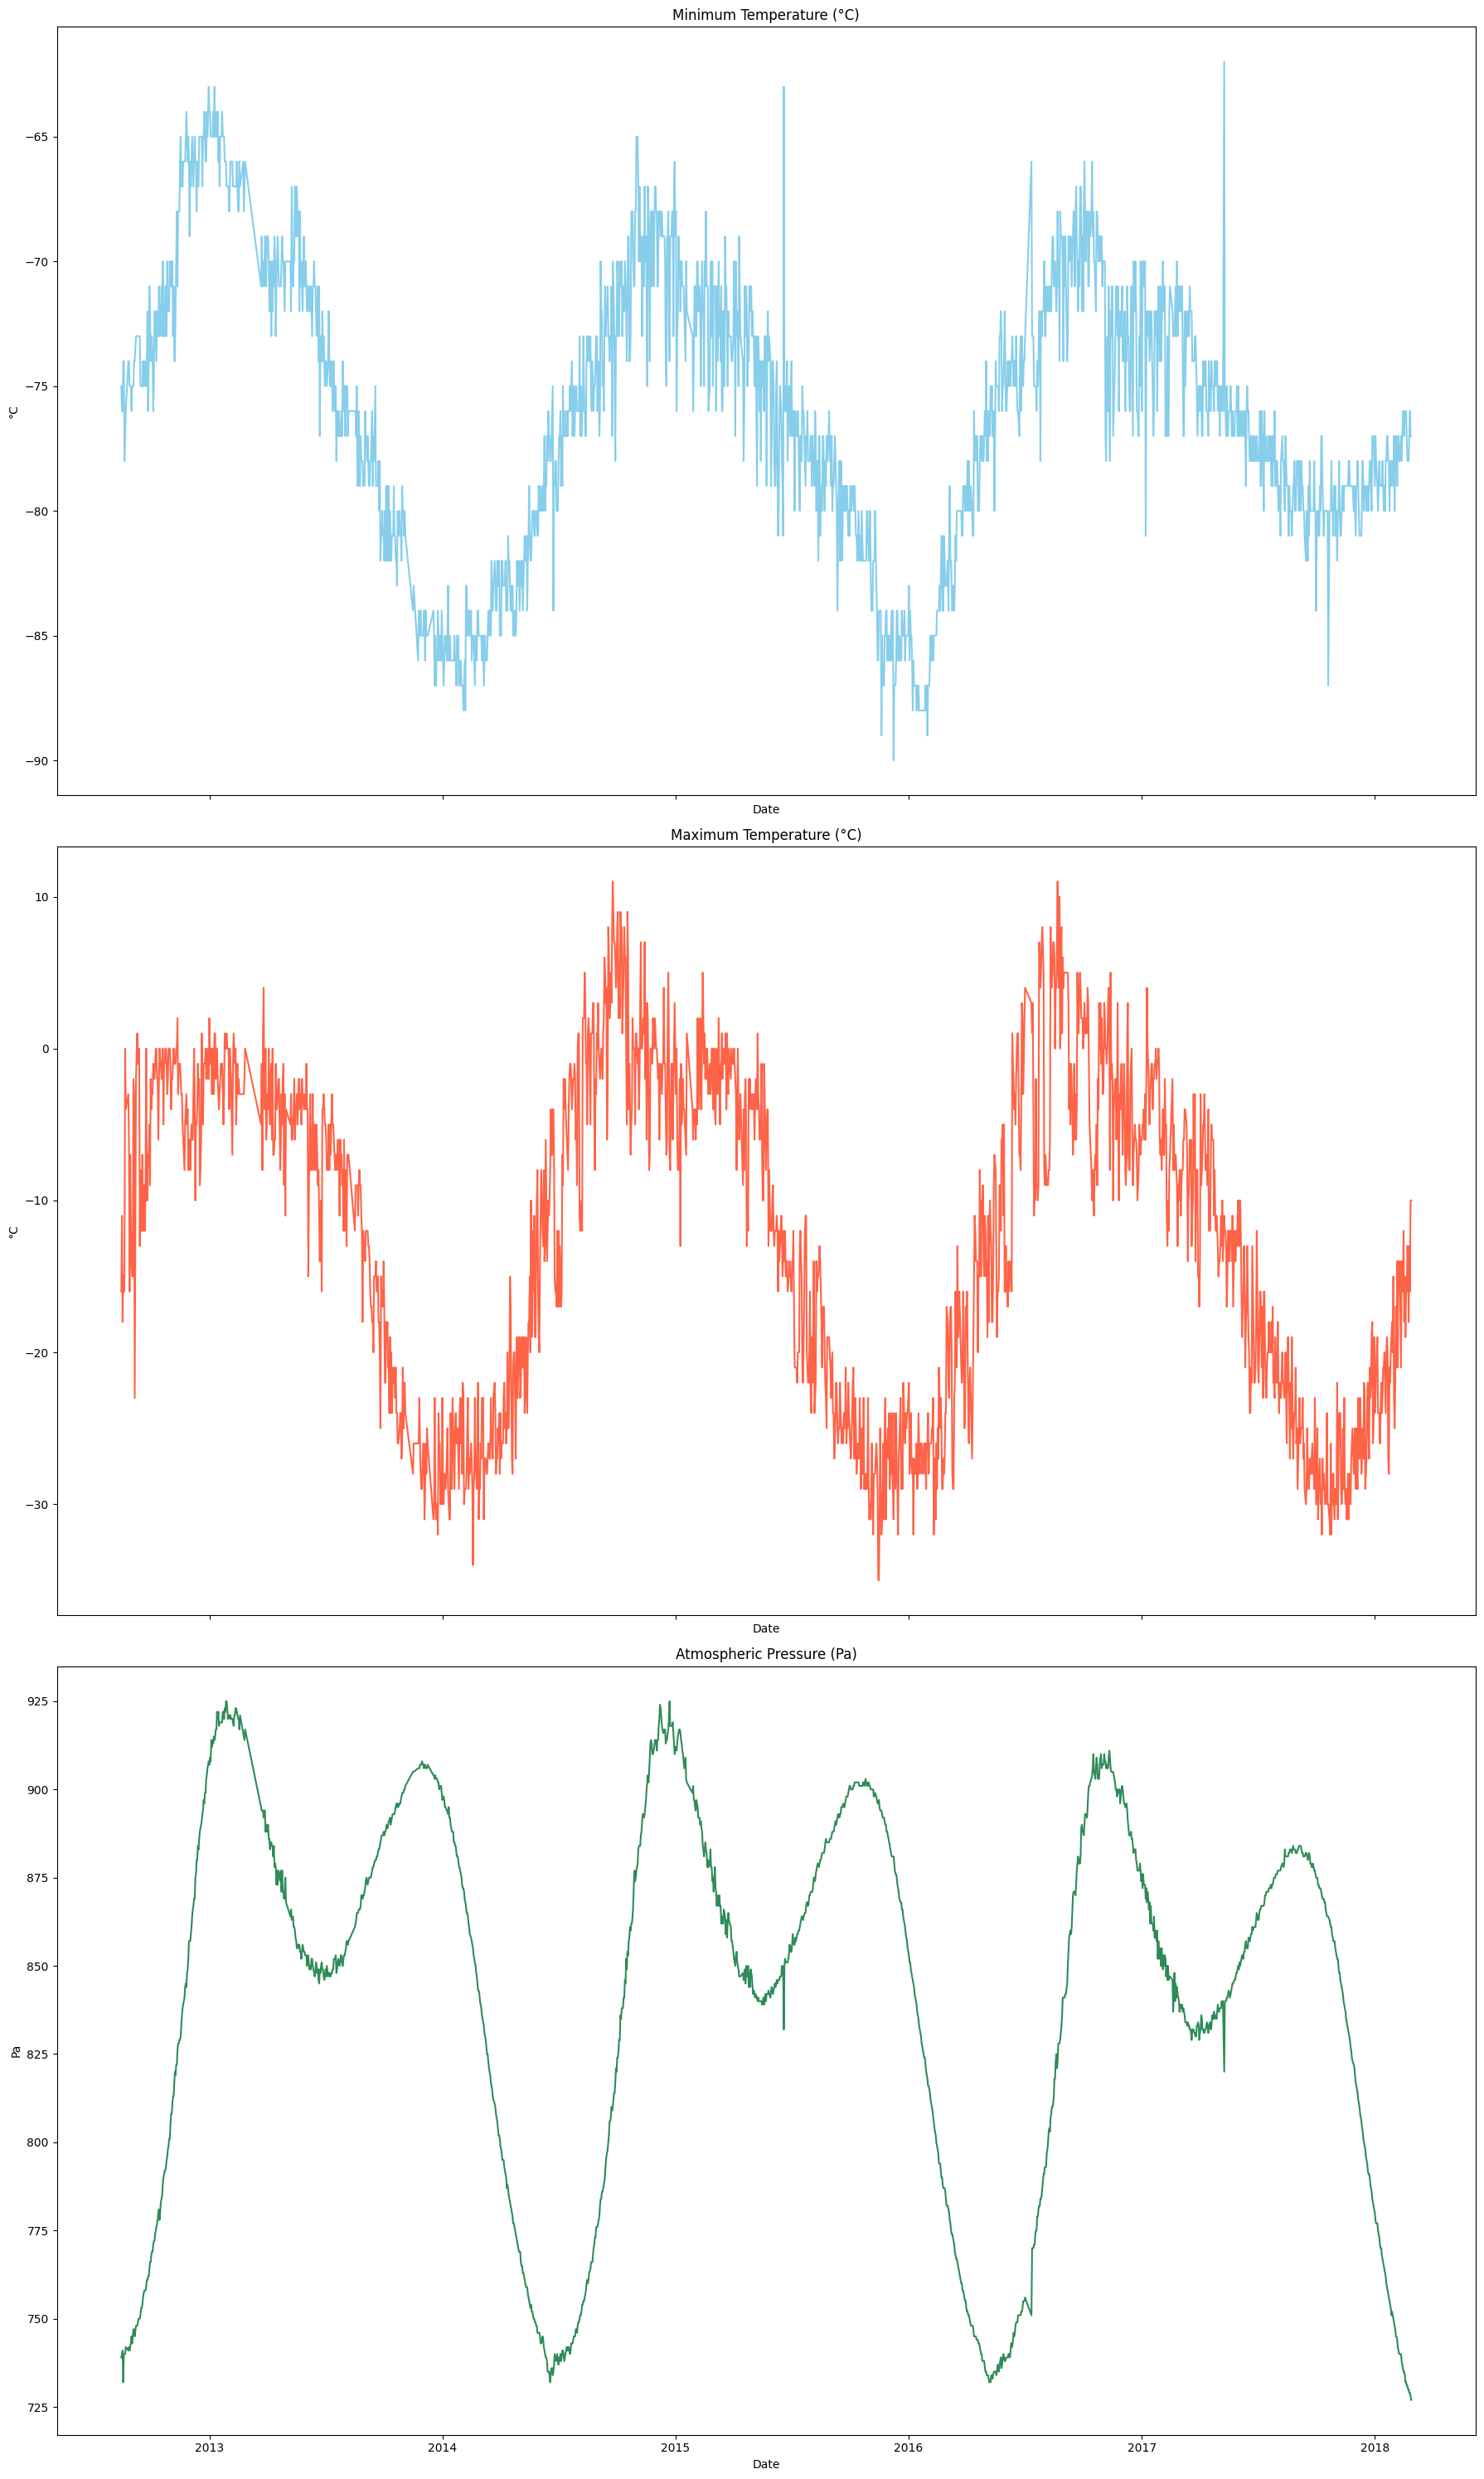

In [10]:
fig, axes = plt.subplots(3, 1, figsize=(18, 30), sharex=True)

axes[0].plot(df["terrestrial_date"], df["min_temp"], color='skyblue')
axes[0].set_title("Minimum Temperature (°C)")
axes[0].set_ylabel("°C")

axes[1].plot(df["terrestrial_date"], df["max_temp"], color='tomato')
axes[1].set_title("Maximum Temperature (°C)")
axes[1].set_ylabel("°C")

axes[2].plot(df["terrestrial_date"], df["pressure"], color='seagreen')
axes[2].set_title("Atmospheric Pressure (Pa)")
axes[2].set_ylabel("Pa")

for ax in axes:
    ax.set_xlabel("Date")
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

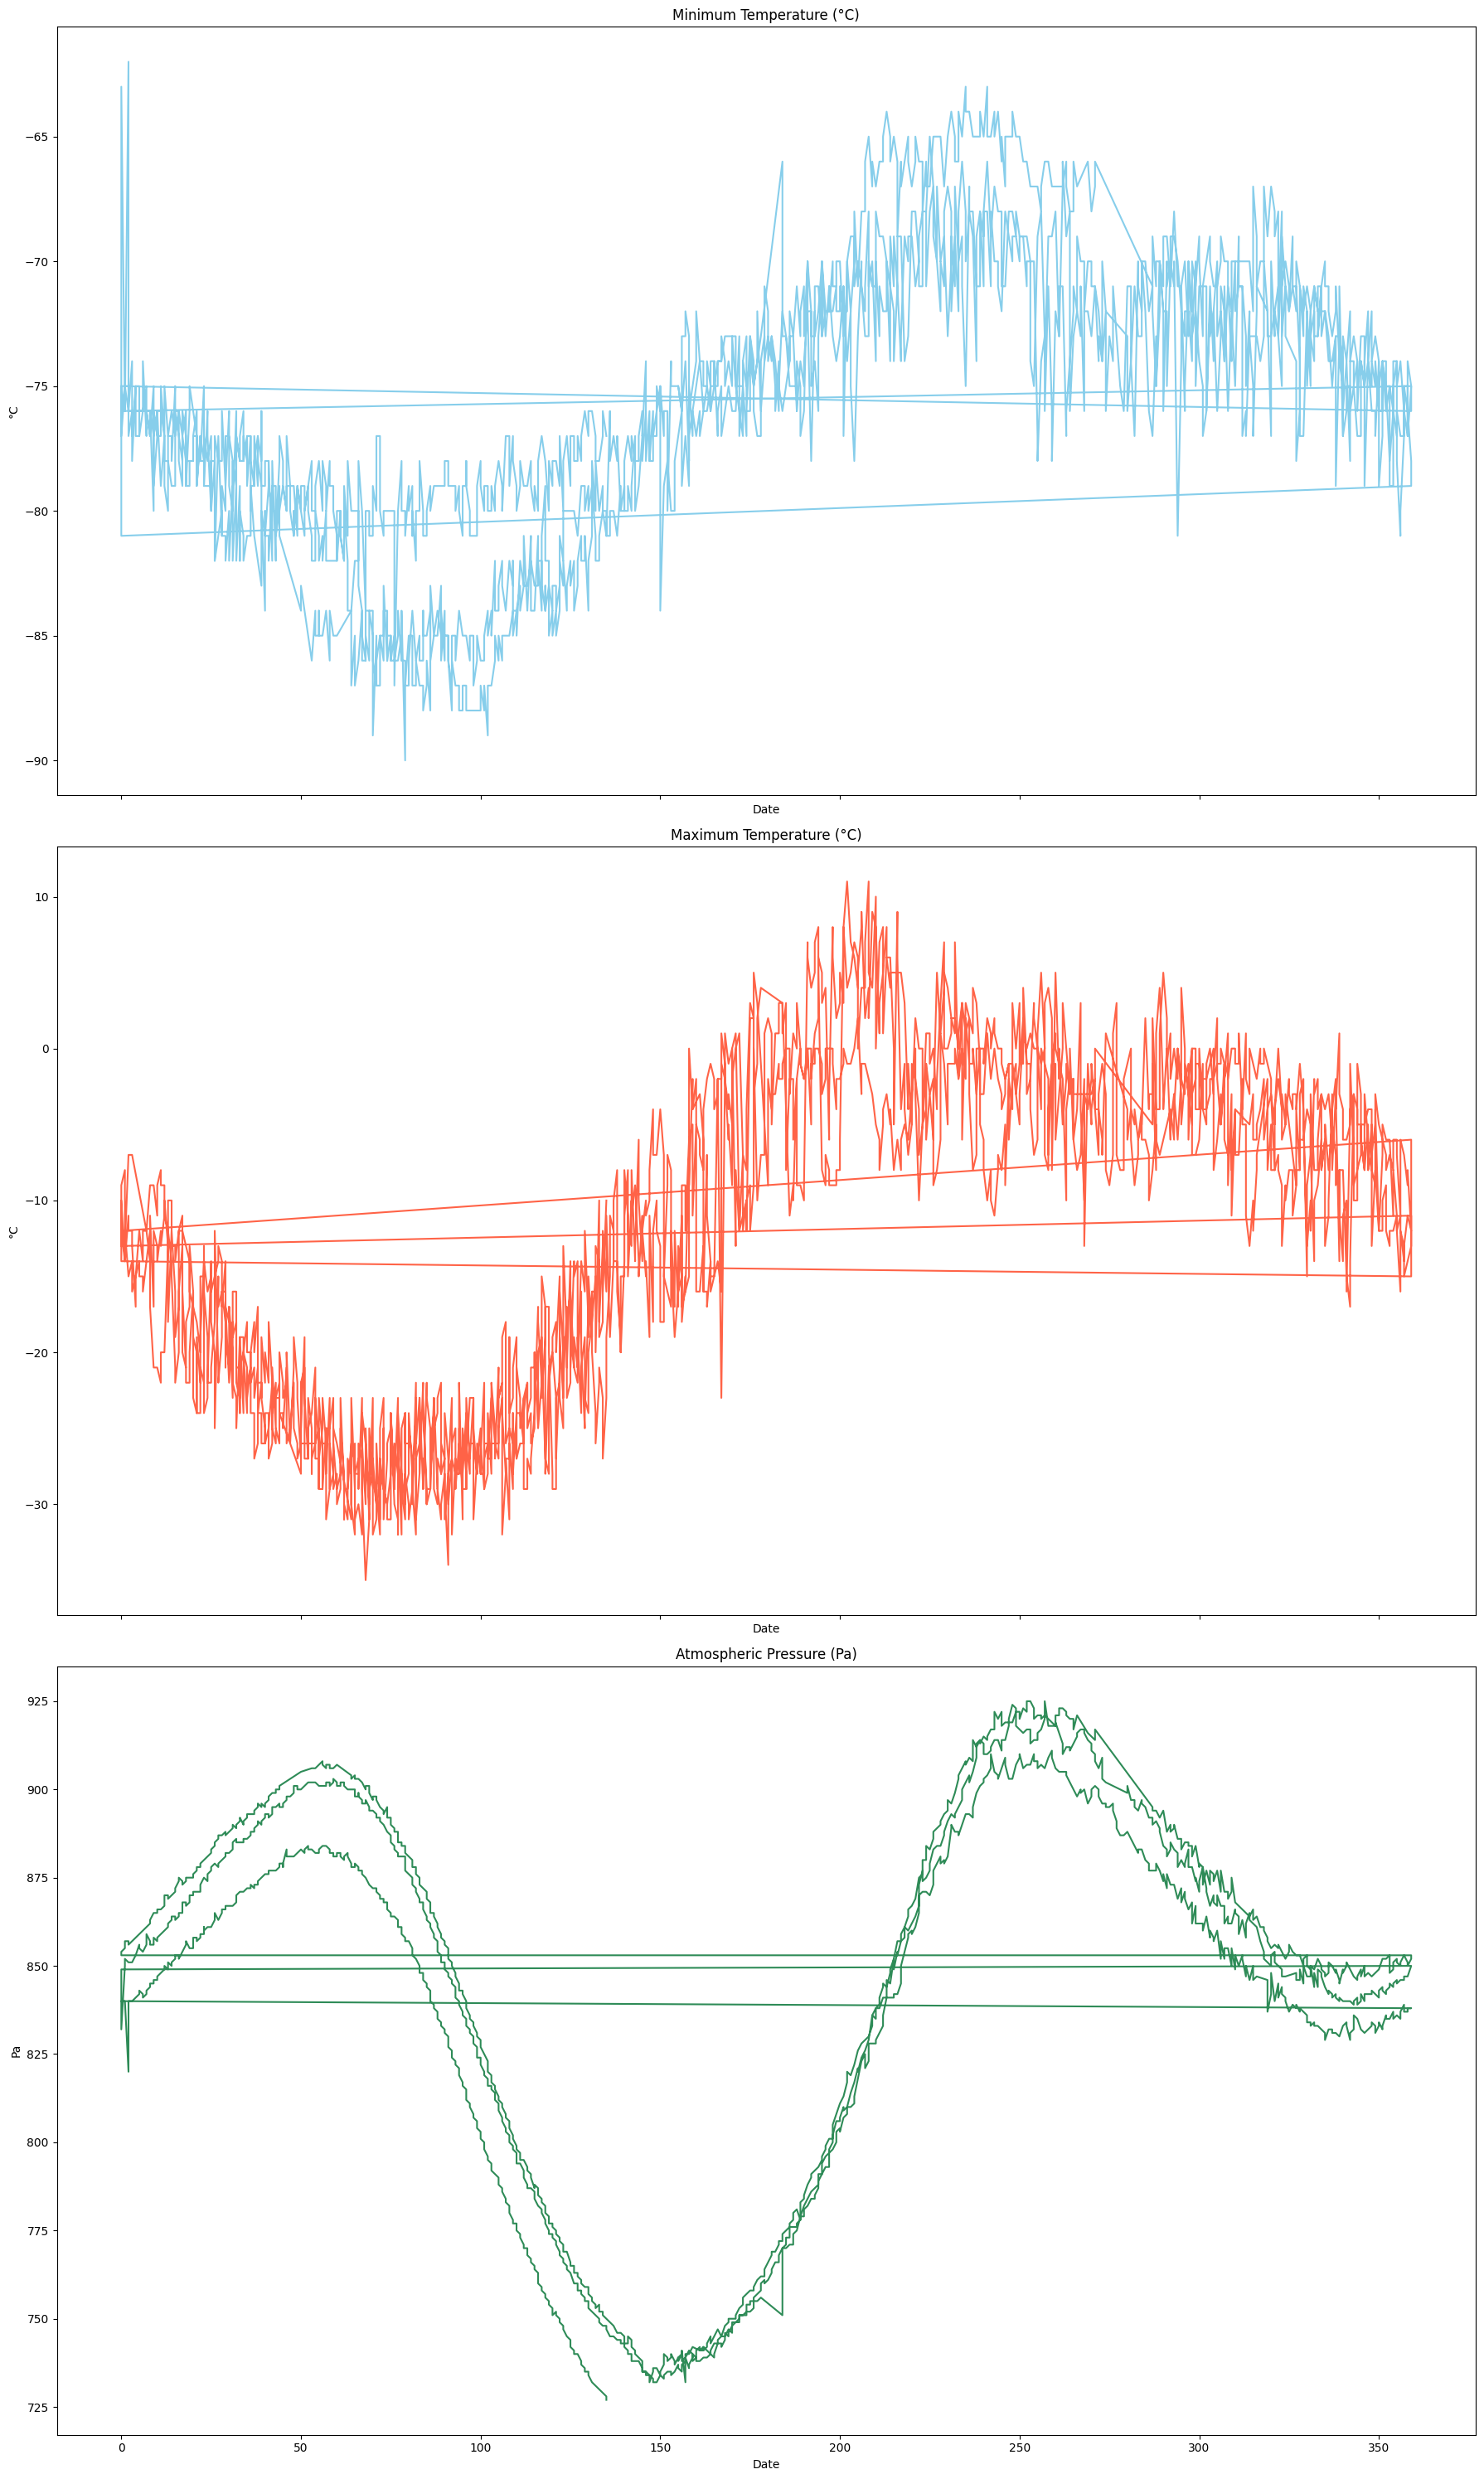

In [11]:
fig, axes = plt.subplots(3, 1, figsize=(18, 30), sharex=True)

axes[0].plot(df["ls"], df["min_temp"], color='skyblue')
axes[0].set_title("Minimum Temperature (°C)")
axes[0].set_ylabel("°C")

axes[1].plot(df["ls"], df["max_temp"], color='tomato')
axes[1].set_title("Maximum Temperature (°C)")
axes[1].set_ylabel("°C")

axes[2].plot(df["ls"], df["pressure"], color='seagreen')
axes[2].set_title("Atmospheric Pressure (Pa)")
axes[2].set_ylabel("Pa")

for ax in axes:
    ax.set_xlabel("Date")
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

In [12]:
colors = df["anomaly"].map({1: "blue", -1: "red"})

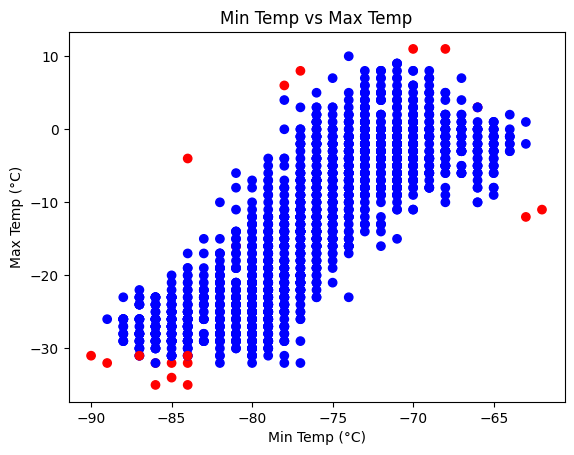

In [13]:
plt.scatter(df["min_temp"], df["max_temp"], c=colors)
plt.xlabel("Min Temp (°C)")
plt.ylabel("Max Temp (°C)")
plt.title("Min Temp vs Max Temp")
plt.show()

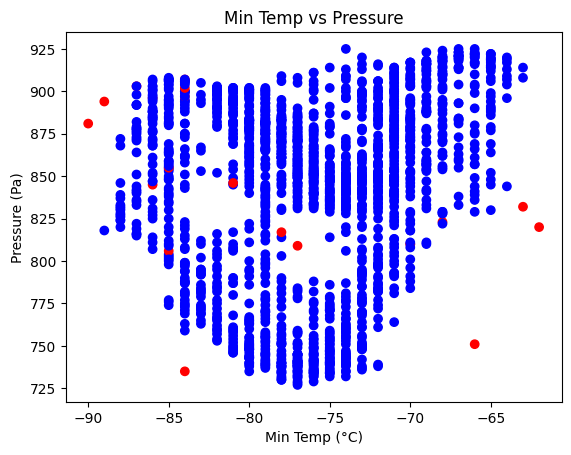

In [14]:
plt.scatter(df["min_temp"], df["pressure"], c=colors)
plt.xlabel("Min Temp (°C)")
plt.ylabel("Pressure (Pa)")
plt.title("Min Temp vs Pressure")
plt.show()

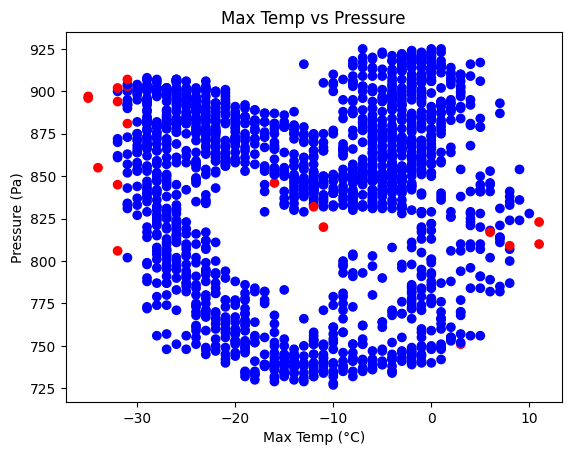

In [15]:
plt.scatter(df["max_temp"], df["pressure"], c=colors)
plt.xlabel("Max Temp (°C)")
plt.ylabel("Pressure (Pa)")
plt.title("Max Temp vs Pressure")
plt.show()

In [16]:
normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

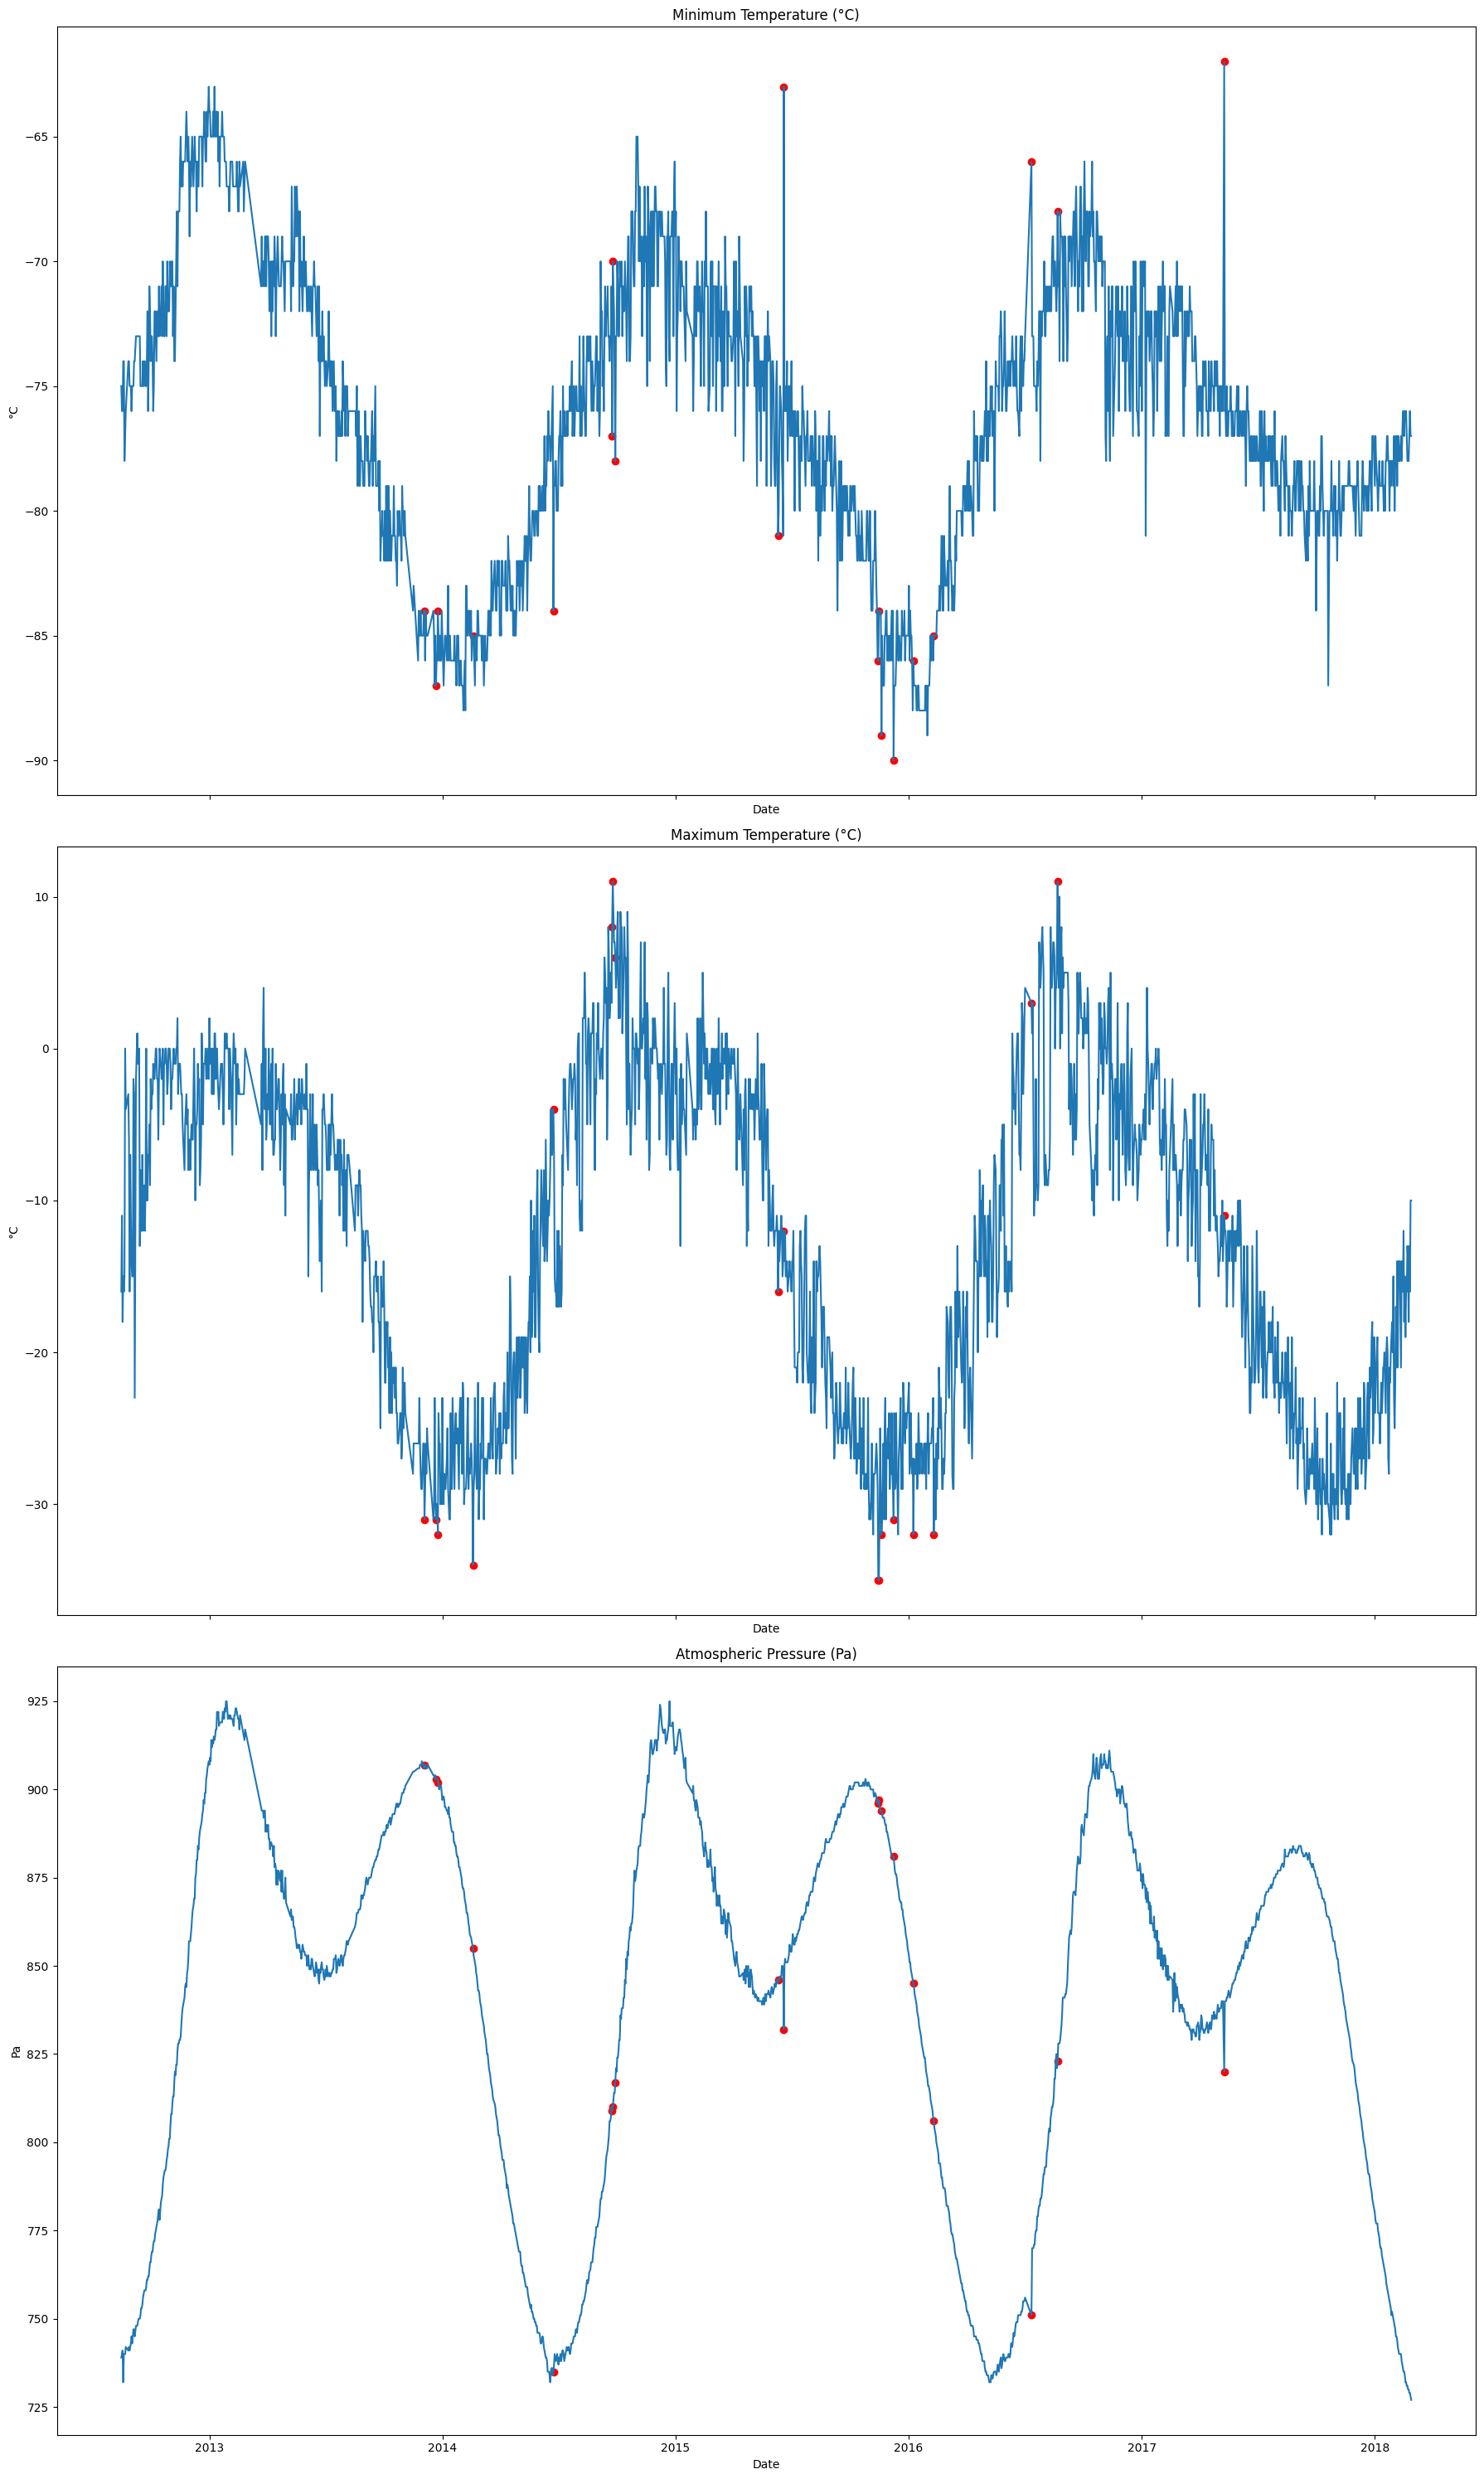

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(18, 30), sharex=True)

axes[0].plot(df["terrestrial_date"], df["min_temp"])
axes[0].scatter(anomaly["terrestrial_date"], anomaly["min_temp"], color='red')
axes[0].set_title("Minimum Temperature (°C)")
axes[0].set_ylabel("°C")

axes[1].plot(df["terrestrial_date"], df["max_temp"])
axes[1].scatter(anomaly["terrestrial_date"], anomaly["max_temp"], color='red')
axes[1].set_title("Maximum Temperature (°C)")
axes[1].set_ylabel("°C")

axes[2].plot(df["terrestrial_date"], df["pressure"])
axes[2].scatter(anomaly["terrestrial_date"], anomaly["pressure"], color='red')
axes[2].set_title("Atmospheric Pressure (Pa)")
axes[2].set_ylabel("Pa")

for ax in axes:
    ax.set_xlabel("Date")
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()

In [18]:
print(anomaly)

     terrestrial_date   sol   ls     month  min_temp  max_temp  pressure  \
id                                                                         
1614       2017-05-10  1692    2   Month 1     -62.0     -11.0     820.0   
1358       2016-08-22  1438  208   Month 7     -68.0      11.0     823.0   
1318       2016-07-12  1398  184   Month 7     -66.0       3.0     751.0   
1180       2016-02-10  1249  106   Month 4     -85.0     -32.0     806.0   
1149       2016-01-09  1218   92   Month 4     -86.0     -32.0     845.0   
1119       2015-12-09  1188   79   Month 3     -90.0     -31.0     881.0   
1100       2015-11-20  1169   70   Month 3     -89.0     -32.0     894.0   
1096       2015-11-16  1165   68   Month 3     -84.0     -35.0     897.0   
1095       2015-11-15  1164   68   Month 3     -86.0     -35.0     896.0   
938        2015-06-20  1020    0   Month 1     -63.0     -12.0     832.0   
949        2015-06-11  1012  356  Month 12     -81.0     -16.0     846.0   
706        2

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(anomaly[features])
    score = silhouette_score(anomaly[features], labels)
    print(f'For n_clusters = {k}, Silhouette Score = {score:.3f}')

For n_clusters = 2, Silhouette Score = 0.618
For n_clusters = 3, Silhouette Score = 0.604
For n_clusters = 4, Silhouette Score = 0.623
For n_clusters = 5, Silhouette Score = 0.623
For n_clusters = 6, Silhouette Score = 0.688
For n_clusters = 7, Silhouette Score = 0.666
For n_clusters = 8, Silhouette Score = 0.611
For n_clusters = 9, Silhouette Score = 0.497
For n_clusters = 10, Silhouette Score = 0.409
For n_clusters = 11, Silhouette Score = 0.349
For n_clusters = 12, Silhouette Score = 0.257
For n_clusters = 13, Silhouette Score = 0.225
For n_clusters = 14, Silhouette Score = 0.223


In [21]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(anomaly[features])
anomaly['cluster'] = kmeans.labels_

C:\Users\Mehmet Öztürk\AppData\Local\Temp\ipykernel_1572\3542301836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly['cluster'] = kmeans.labels_


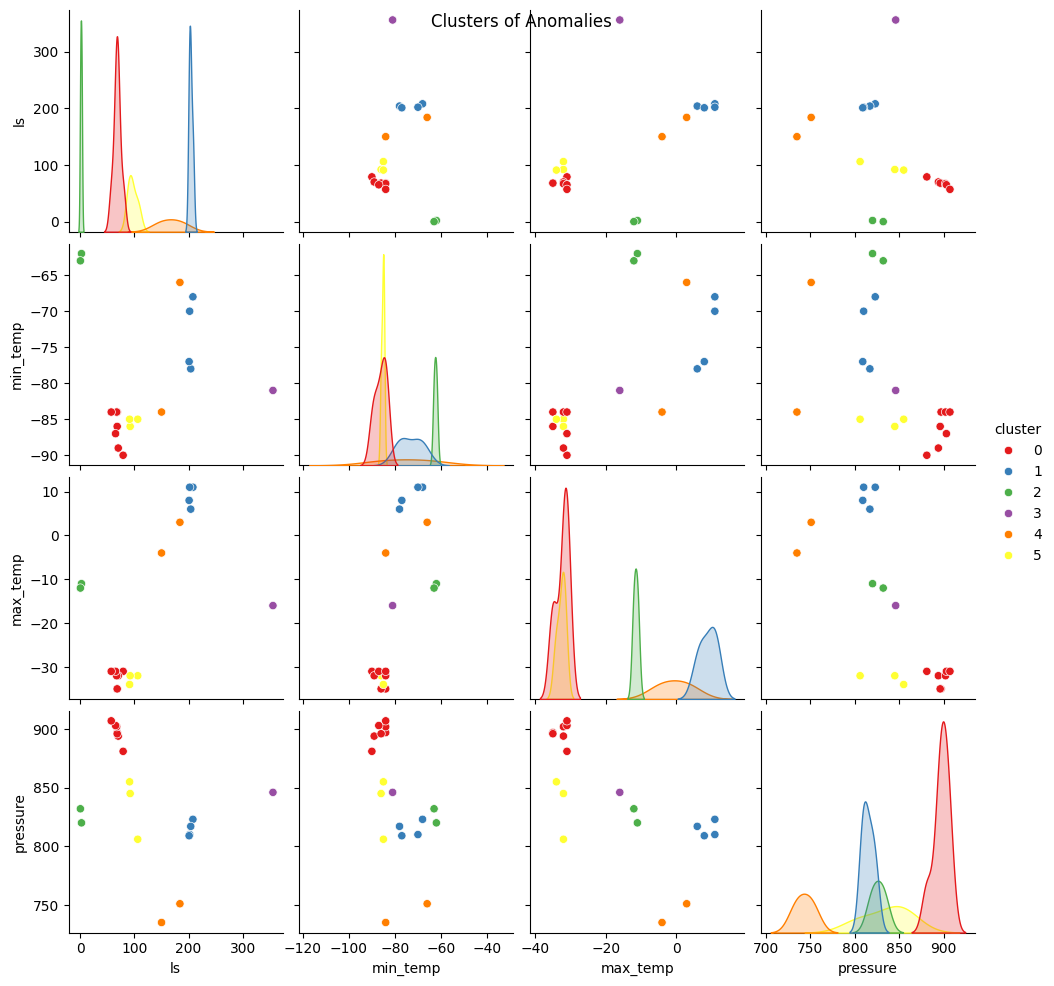

In [22]:
sns.pairplot(anomaly, vars=['ls', 'min_temp', 'max_temp', 'pressure'], hue='cluster', palette='Set1')
plt.suptitle("Clusters of Anomalies")
plt.show()

"Red (0)": {"ls": (50, 100); "min_temp": (-95, -80); "max_temp": (-40, -30); "pressure": (860, 930)}
"Blue(1)": {"ls": (190, 210); "min_temp": (-90, -60); "max_temp": (0, 20); "pressure": (800, 840)}
"Green(2)": {"ls": (0, 10); "min_temp": (-65, -60); "max_temp": (-15, 10); "pressure": (800, 850)}
"Purple(3)": {"ls": 356; "min_temp": -81; "max_temp": -16; "pressure": 846}
"Orange(4)": {"ls": (100, 230); "min_temp": (-120, -30); "max_temp": (-20, 10); "pressure": (700, 775)}
"Yellow(5)": {"ls": (90, 110); "min_temp": (-87, 83); "max_temp": (-37, -30); "pressure": (750, 900)}

In [23]:
from scipy.stats import zscore

In [24]:
red_cluster = anomaly[anomaly["cluster"] == 0]
blue_cluster = anomaly[anomaly["cluster"] == 1]
green_cluster = anomaly[anomaly["cluster"] == 2]
purple_cluster = anomaly[anomaly["cluster"] == 3]
orange_cluster = anomaly[anomaly["cluster"] == 4]
yellow_cluster = anomaly[anomaly["cluster"] == 5]

In [25]:
overall_mean = df[features].mean()
overall_std = df[features].std()

In [26]:
clusters = [red_cluster, blue_cluster, green_cluster, purple_cluster, orange_cluster, yellow_cluster]

In [27]:
cluster_dfs = []

for cluster in clusters:
    cluster_mean = cluster[features].mean()
    delta = cluster_mean - overall_mean
    z_diff = delta / overall_std
    cluster_df = pd.DataFrame({
        'Overall Mean': overall_mean,
        'Cluster Mean': cluster_mean,
        'Delta': delta,
        'Z-Score Difference': z_diff
    })
    cluster_dfs.append(cluster_df)

In [28]:
comparison_df = pd.concat(cluster_dfs, axis=0)
print(comparison_df)

          Overall Mean  Cluster Mean       Delta  Z-Score Difference
ls          168.865024     67.714286 -101.150738           -0.957875
min_temp    -76.121050    -86.285714  -10.164664           -1.846745
max_temp    -12.510445    -32.428571  -19.918127           -1.861602
pressure    841.066417    897.142857   56.076440            1.033606
ls          168.865024    203.750000   34.884976            0.330353
min_temp    -76.121050    -73.250000    2.871050            0.521620
max_temp    -12.510445      9.000000   21.510445            2.010424
pressure    841.066417    814.750000  -26.316417           -0.485066
ls          168.865024      1.000000 -167.865024           -1.589644
min_temp    -76.121050    -62.500000   13.621050            2.474711
max_temp    -12.510445    -11.500000    1.010445            0.094439
pressure    841.066417    826.000000  -15.066417           -0.277705
ls          168.865024    356.000000  187.134976            1.772126
min_temp    -76.121050    -81.0000

In [29]:
normal["cluster"] = -1
all_labeled = pd.concat([anomaly, normal])

C:\Users\Mehmet Öztürk\AppData\Local\Temp\ipykernel_1572\2947624108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["cluster"] = -1


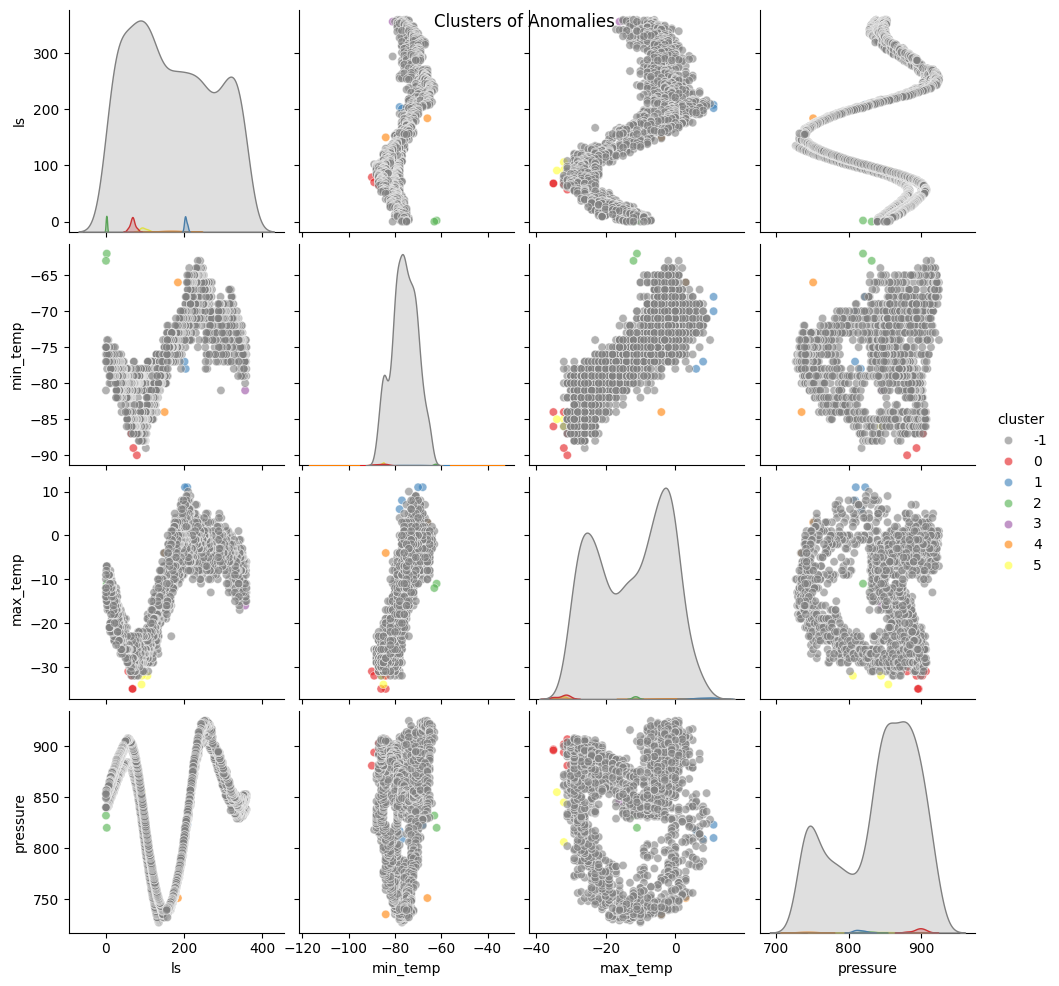

In [30]:
sns.pairplot(all_labeled, vars=['ls', 'min_temp', 'max_temp', 'pressure'], hue='cluster', palette=["grey"] + sns.color_palette("Set1", 6), plot_kws={'alpha': 0.6})
plt.suptitle("Clusters of Anomalies")
plt.show()

In [31]:
print(anomaly['month'].value_counts())
print(anomaly['sol'].value_counts().head(10))

month
Month 3     6
Month 7     5
Month 4     3
Month 1     2
Month 12    1
Month 6     1
Month 2     1
Name: count, dtype: int64
sol
1692    1
1438    1
1398    1
1249    1
1218    1
1188    1
1169    1
1165    1
1164    1
1020    1
Name: count, dtype: int64


In [32]:
iso2 = IsolationForest(contamination=0.05, random_state=42)
df["anomaly"] = iso2.fit_predict(X_scaled)

In [33]:
normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

In [34]:
from sklearn.metrics import silhouette_score

for k in range(2, 40):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(anomaly[features])
    score = silhouette_score(anomaly[features], labels)
    print(f'For n_clusters = {k}, Silhouette Score = {score:.3f}')

For n_clusters = 2, Silhouette Score = 0.582
For n_clusters = 3, Silhouette Score = 0.618
For n_clusters = 4, Silhouette Score = 0.617
For n_clusters = 5, Silhouette Score = 0.596
For n_clusters = 6, Silhouette Score = 0.587
For n_clusters = 7, Silhouette Score = 0.602
For n_clusters = 8, Silhouette Score = 0.657
For n_clusters = 9, Silhouette Score = 0.636
For n_clusters = 10, Silhouette Score = 0.614
For n_clusters = 11, Silhouette Score = 0.613
For n_clusters = 12, Silhouette Score = 0.595
For n_clusters = 13, Silhouette Score = 0.593
For n_clusters = 14, Silhouette Score = 0.619
For n_clusters = 15, Silhouette Score = 0.562
For n_clusters = 16, Silhouette Score = 0.558
For n_clusters = 17, Silhouette Score = 0.558
For n_clusters = 18, Silhouette Score = 0.545
For n_clusters = 19, Silhouette Score = 0.547
For n_clusters = 20, Silhouette Score = 0.536
For n_clusters = 21, Silhouette Score = 0.486
For n_clusters = 22, Silhouette Score = 0.505
For n_clusters = 23, Silhouette Score = 0.

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42).fit(anomaly[features])
anomaly['cluster'] = kmeans.labels_

C:\Users\Mehmet Öztürk\AppData\Local\Temp\ipykernel_1572\93007714.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomaly['cluster'] = kmeans.labels_


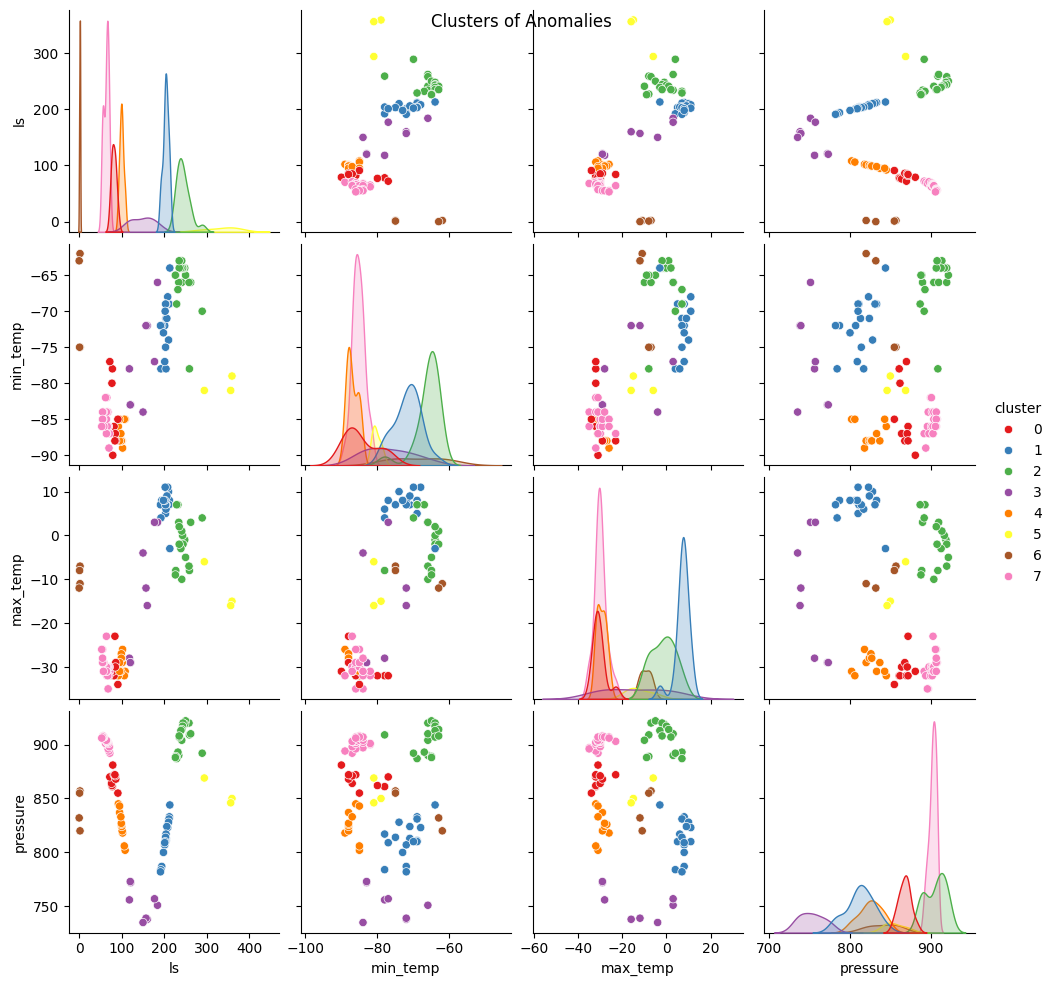

In [36]:
sns.pairplot(anomaly, vars=['ls', 'min_temp', 'max_temp', 'pressure'], hue='cluster', palette='Set1')
plt.suptitle("Clusters of Anomalies")
plt.show()

In [37]:
normal["cluster"] = -1
all_labeled = pd.concat([anomaly, normal])

C:\Users\Mehmet Öztürk\AppData\Local\Temp\ipykernel_1572\2947624108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal["cluster"] = -1


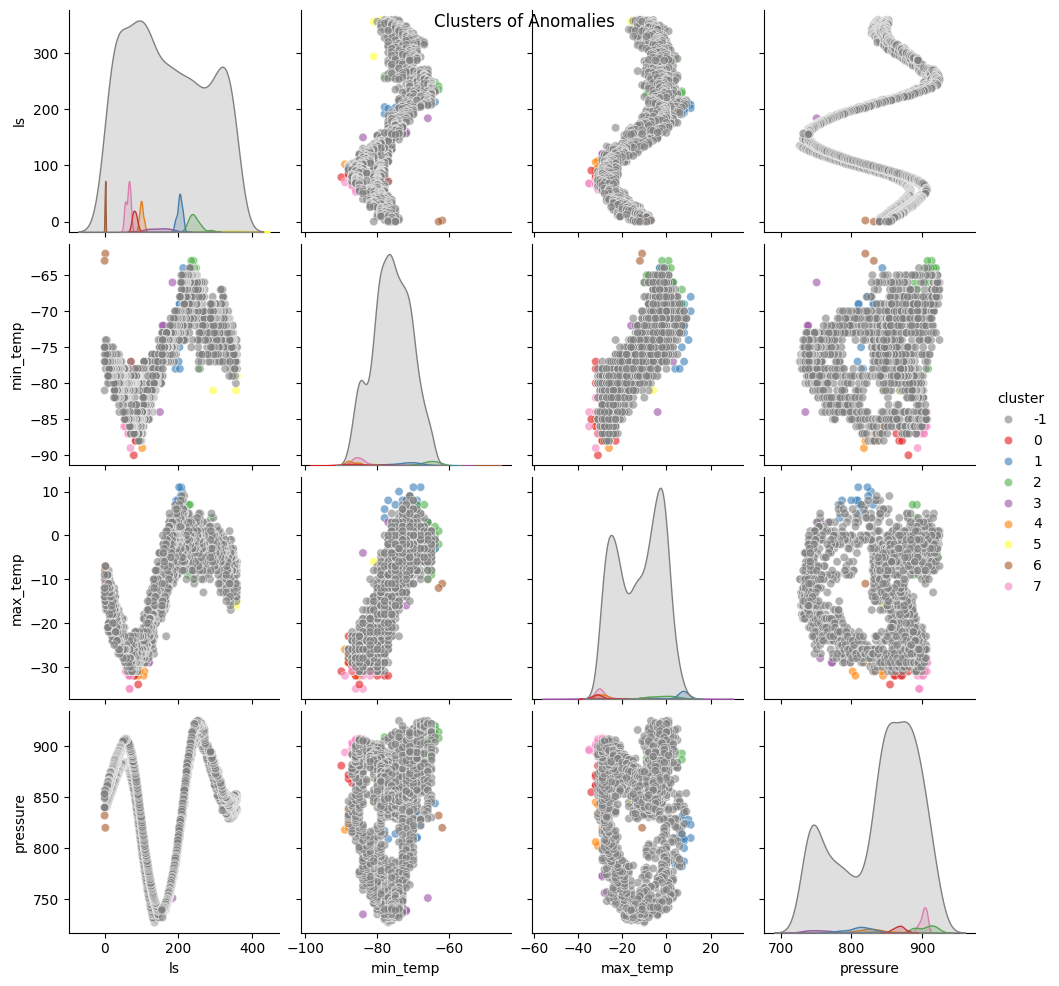

In [38]:
sns.pairplot(all_labeled, vars=['ls', 'min_temp', 'max_temp', 'pressure'], hue='cluster', palette=["grey"] + sns.color_palette("Set1", 8), plot_kws={'alpha': 0.6})
plt.suptitle("Clusters of Anomalies")
plt.show()

## Prophet

In [39]:
df_prophet = df[["terrestrial_date", "max_temp"]].dropna()
df_prophet.columns = ["ds", "y"]

In [40]:
from prophet import Prophet

C:\Users\Mehmet Öztürk\Desktop\Ders\Jupyter\IsoForest\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [41]:
model = Prophet()
model.fit(df_prophet)

10:33:25 - cmdstanpy - INFO - Chain [1] start processing
10:33:26 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future = model.make_future_dataframe(periods=0)
forecast = model.predict(future)

In [43]:
df_prophet['yhat'] = forecast['yhat']
df_prophet['yhat_lower'] = forecast['yhat_lower']
df_prophet['yhat_upper'] = forecast['yhat_upper']

df_prophet['anomaly'] = (
    (df_prophet['y'] < df_prophet['yhat_lower']) |
    (df_prophet['y'] > df_prophet['yhat_upper'])
)

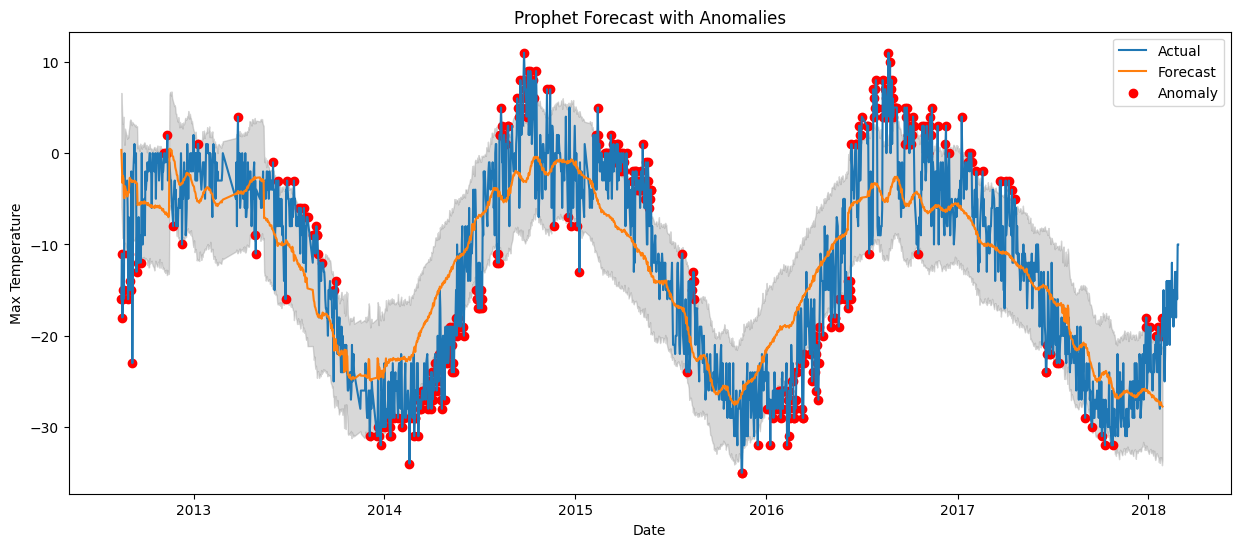

In [44]:
plt.figure(figsize=(15, 6))
plt.plot(df_prophet['ds'], df_prophet['y'], label='Actual')
plt.plot(df_prophet['ds'], df_prophet['yhat'], label='Forecast')
plt.fill_between(df_prophet['ds'], df_prophet['yhat_lower'], df_prophet['yhat_upper'], color='gray', alpha=0.3)

anomalies = df_prophet[df_prophet['anomaly']]
plt.scatter(anomalies['ds'], anomalies['y'], color='red', label='Anomaly')

plt.legend()
plt.title('Prophet Forecast with Anomalies')
plt.xlabel('Date')
plt.ylabel('Max Temperature')
plt.show()

In [45]:
anomalies = df_prophet[df_prophet['anomaly']]
print(anomalies[['ds', 'y', 'yhat', 'yhat_lower', 'yhat_upper']])

             ds     y       yhat  yhat_lower  yhat_upper
id                                                      
1866 2018-01-28 -18.0 -27.753087  -33.538285  -21.122917
1865 2018-01-27 -19.0 -27.675554  -34.182120  -21.259399
1864 2018-01-26 -20.0 -27.560420  -33.340561  -21.153609
1856 2018-01-21 -20.0 -27.178628  -33.849198  -21.792741
1858 2018-01-20 -19.0 -27.162307  -33.303312  -20.944224
...         ...   ...        ...         ...         ...
46   2012-08-20 -16.0  -2.781046   -9.052321    3.993745
35   2012-08-19 -15.0  -2.492040   -9.325609    3.294589
24   2012-08-18 -18.0  -3.267212   -9.266994    3.255433
13   2012-08-17 -11.0  -1.408459   -7.306063    5.161200
2    2012-08-16 -16.0   0.354190   -5.846820    6.593277

[429 rows x 5 columns]


In [55]:
from prophet import Prophet

In [56]:
from prophet import Prophet

model = Prophet()


AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [54]:
changepoint_values = np.logspace(-3, 0.3, 20)

results = []

for cps in changepoint_values:
    model = Prophet(changepoint_prior_scale=cps, yearly_seasonality=True)
    model.fit(df)
    
    forecast = model.predict(df)
    y_true = df['y']
    y_pred = forecast['yhat']
    
    error = mean_absolute_error(y_true, y_pred)
    results.append({'changepoint_prior_scale': cps, 'mae': error})

results_df = pd.DataFrame(results)
print(results_df.sort_values('mae'))

AttributeError: 'Prophet' object has no attribute 'stan_backend'

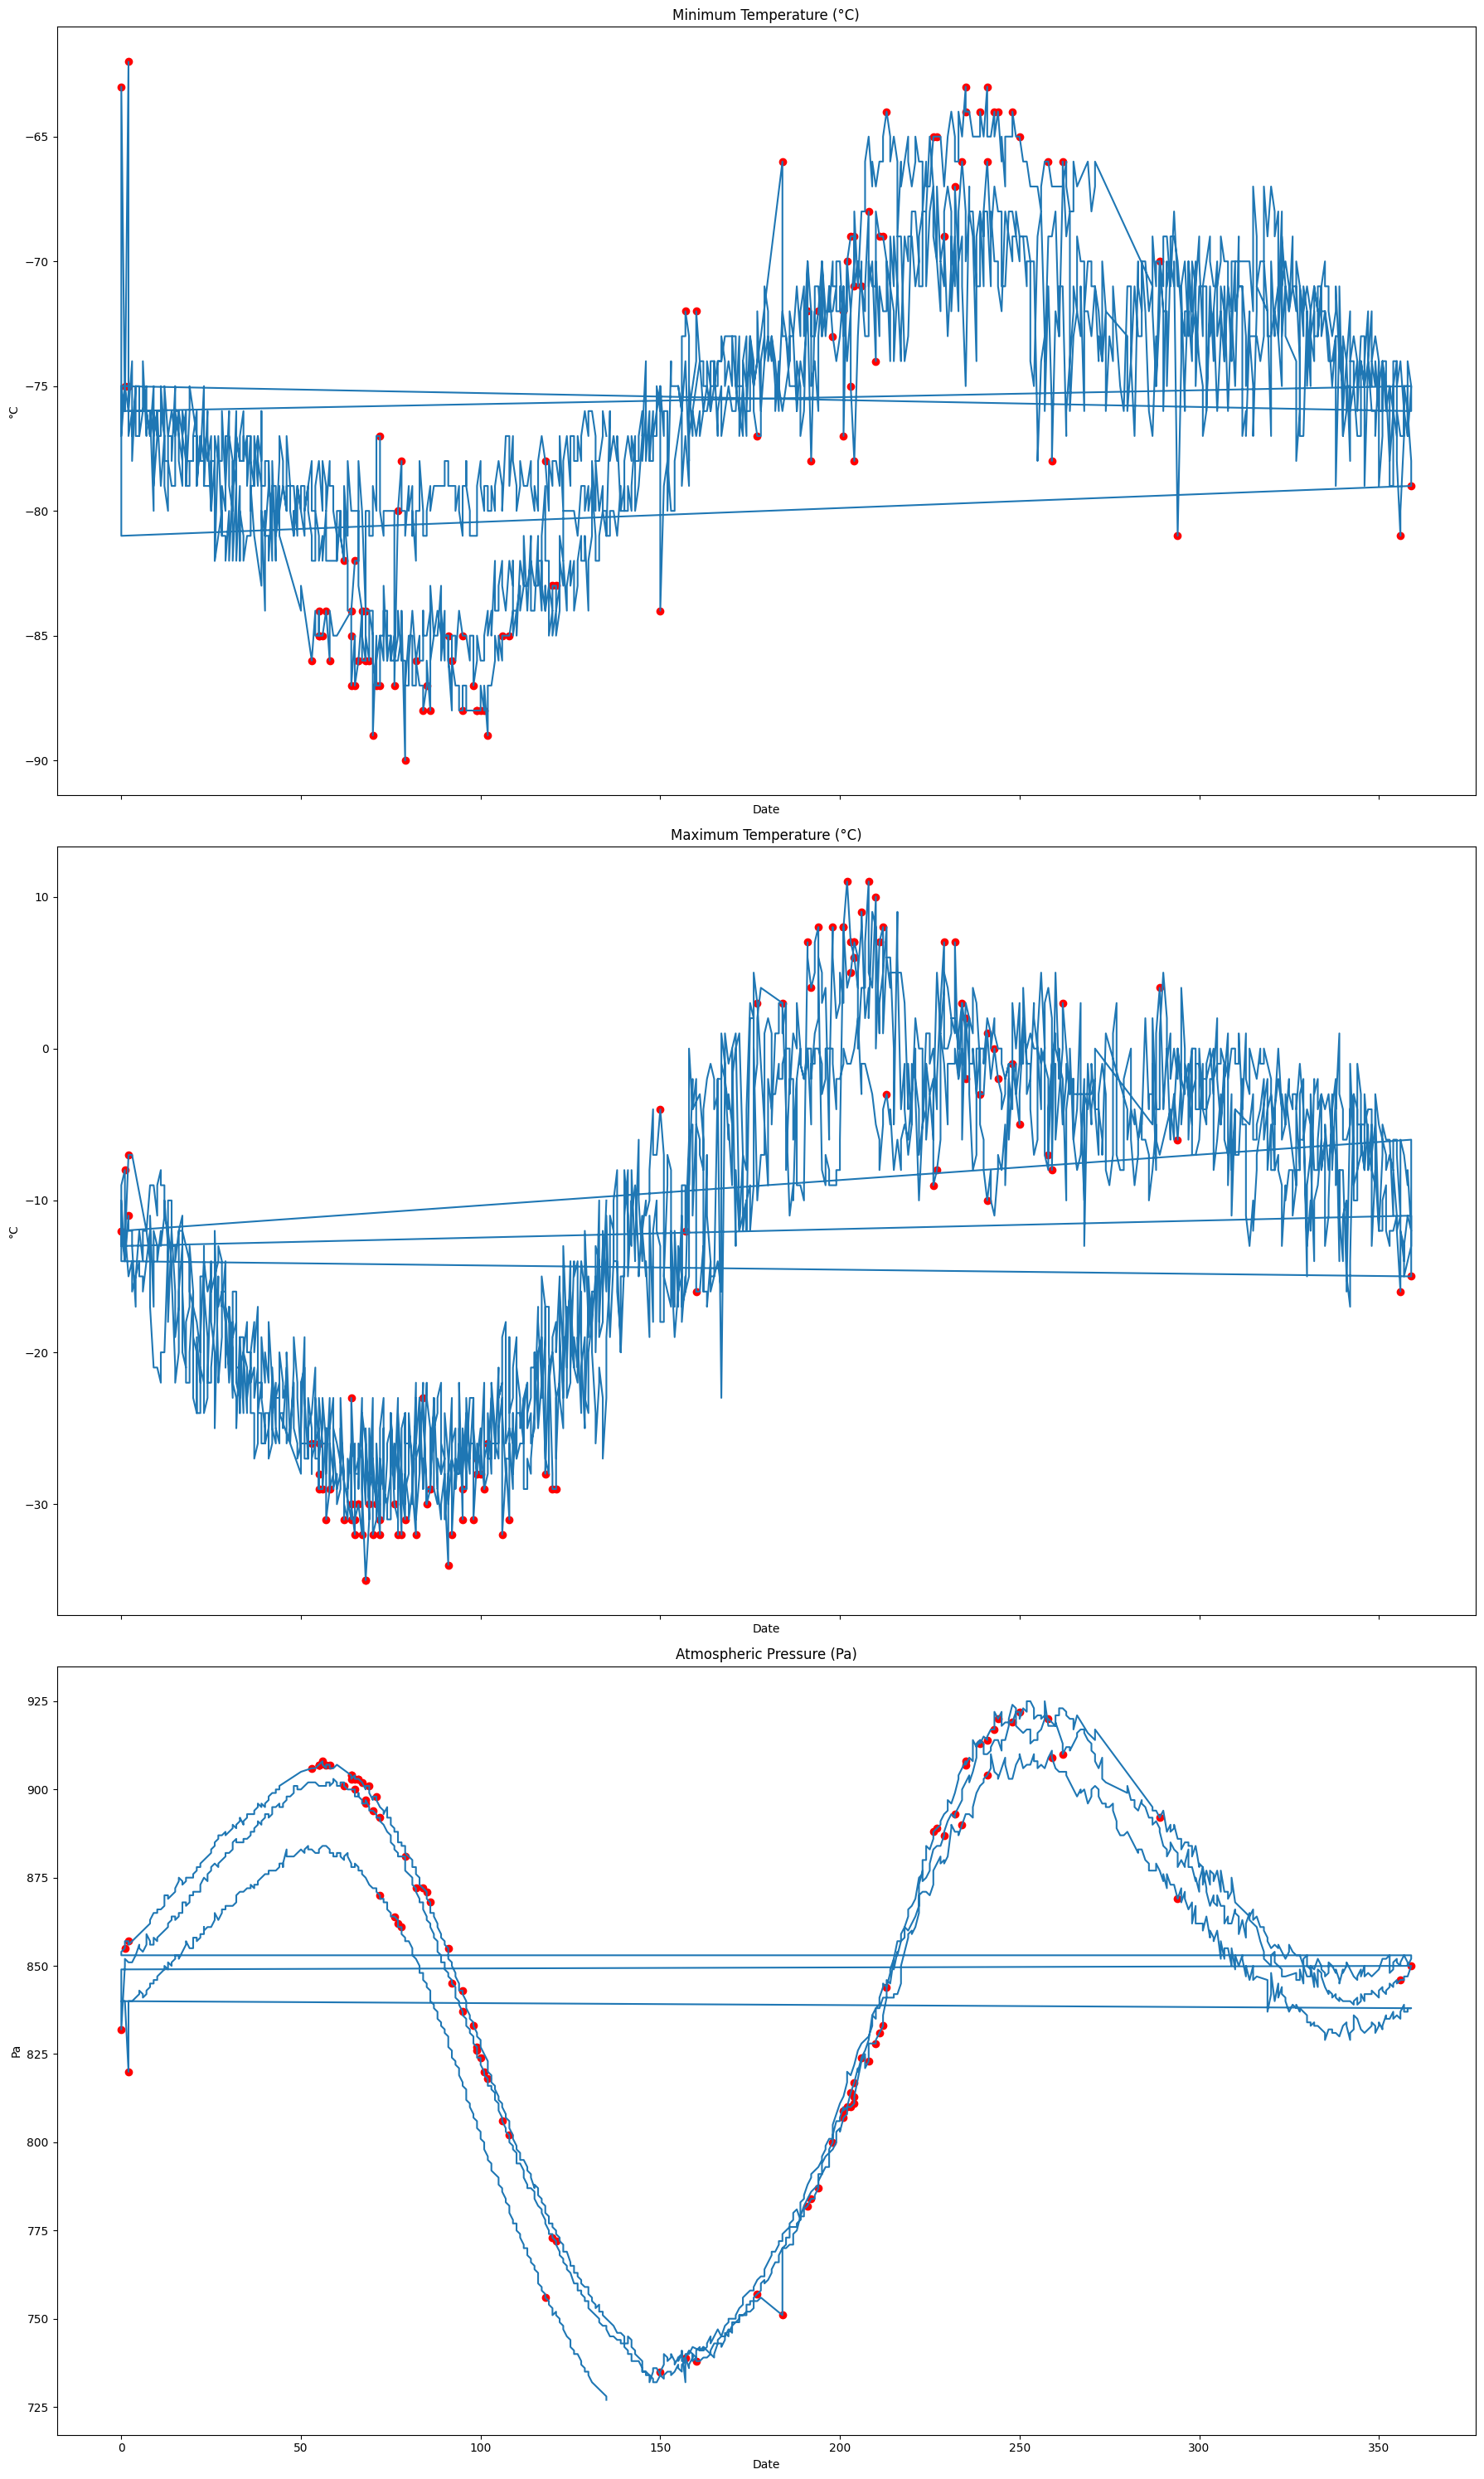

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(18, 30), sharex=True)

axes[0].plot(df["ls"], df["min_temp"])
axes[0].scatter(anomaly["ls"], anomaly["min_temp"], color='red')
axes[0].set_title("Minimum Temperature (°C)")
axes[0].set_ylabel("°C")

axes[1].plot(df["ls"], df["max_temp"])
axes[1].scatter(anomaly["ls"], anomaly["max_temp"], color='red')
axes[1].set_title("Maximum Temperature (°C)")
axes[1].set_ylabel("°C")

axes[2].plot(df["ls"], df["pressure"])
axes[2].scatter(anomaly["ls"], anomaly["pressure"], color='red')
axes[2].set_title("Atmospheric Pressure (Pa)")
axes[2].set_ylabel("Pa")

for ax in axes:
    ax.set_xlabel("Date")
    ax.tick_params(axis='x')

plt.tight_layout()
plt.show()